# 機械学習をPythonで実践する

In [247]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import product
from cost_func import cost_func
from grad_descent import grad_descent

%matplotlib inline
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## ○ 最急降下法をスクラッチで実装する
リソース：~/python-work/TIL/Python/sample_data/ML_sample/sample_data.csv

In [2]:
# サンプルデータ（賃貸の広さと家賃の関係データ）を読み込む
df = pd.read_csv('../Python/sample_data/ML_sample/sample_data.csv')
df

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674
5,51,16.068166
6,55,23.183599
7,62,22.212595
8,83,29.357010
9,103,37.565129


<AxesSubplot:xlabel='space', ylabel='rent'>

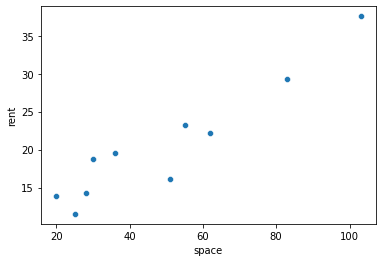

In [11]:
# データを可視化
sns.scatterplot(x=df['space'], y=df['rent'])

### - 損失関数を定義

In [82]:
# 損失関数cost_funcを呼び出し
# thetaは線形回帰モデルのパラメタの初期値
theta = np.array([[2.0] , [1.0]])
# .valuesでnumpy arrayで値を取得
target_var = df['rent'].values
features = df['space'].values
cost_func(theta, target_var=target_var, features=features)

array([1296.33604159])

### - 損失関数を可視化する
講義のやり方では2パラメタ（と1つの特徴量）のみの対応だが、任意のパラメタ数に  
対応できるように関数の拡張を目指す。

In [480]:
# 3Dプロット用のデータを用意する。
# x,y軸はtheta_0,theta_1
# z軸は損失関数の戻り値（MSE）

# サンプルデータより、theta_0の範囲（切片）は-20～20、theta_1（傾き）の範囲は -1 ～ 1と設定。
n0 = n1 = 300
min_0 = -20
max_0 = 20
min_1 = -1
max_1 = 1

theta_0 = np.linspace(min_0,max_0,n0)
theta_1 = np.linspace(min_1,max_1,n1)
theta_mesh = np.meshgrid(theta_0,theta_1)
theta_mesh

[array([[-20.        , -19.86622074, -19.73244147, ...,  19.73244147,
          19.86622074,  20.        ],
        [-20.        , -19.86622074, -19.73244147, ...,  19.73244147,
          19.86622074,  20.        ],
        [-20.        , -19.86622074, -19.73244147, ...,  19.73244147,
          19.86622074,  20.        ],
        ...,
        [-20.        , -19.86622074, -19.73244147, ...,  19.73244147,
          19.86622074,  20.        ],
        [-20.        , -19.86622074, -19.73244147, ...,  19.73244147,
          19.86622074,  20.        ],
        [-20.        , -19.86622074, -19.73244147, ...,  19.73244147,
          19.86622074,  20.        ]]),
 array([[-1.        , -1.        , -1.        , ..., -1.        ,
         -1.        , -1.        ],
        [-0.99331104, -0.99331104, -0.99331104, ..., -0.99331104,
         -0.99331104, -0.99331104],
        [-0.98662207, -0.98662207, -0.98662207, ..., -0.98662207,
         -0.98662207, -0.98662207],
        ...,
        [ 0.986622

In [470]:
# 10/8 thetaをリストで渡せるようにcost_funcを修正した。
theta = [theta_0, theta_1]
# パラメータの全組み合わせをリスト化し、配列に変換
theta_array = np.array(list(product(*theta)))
target_var = df['rent'].values
features = df['space'].values
mse = cost_func(theta_array, target_var=target_var, features=features)

In [471]:
mse_reshape = mse.reshape(len(theta_0), len(theta_1))
mse_reshape

array([[9180.43815951, 9109.88103261, 9039.60106593, ...,  407.8256952 ,
         419.58515089,  431.6217668 ],
       [9156.38986166, 9085.92096644, 9015.72923143, ...,  409.9822049 ,
         421.82989227,  433.95473985],
       [9132.37735759, 9061.99669405, 8991.89319072, ...,  412.17450839,
         424.11042743,  436.32350669],
       ...,
       [3611.44522664, 3567.0929073 , 3523.01774817, ..., 2621.66060542,
        2659.62486867, 2697.86629212],
       [3598.02768236, 3553.7635947 , 3509.77666724, ..., 2634.44786869,
        2672.50036362, 2710.83001875],
       [3584.64593187, 3540.47007588, 3496.5713801 , ..., 2647.27092575,
        2685.41165235, 2723.82953916]])

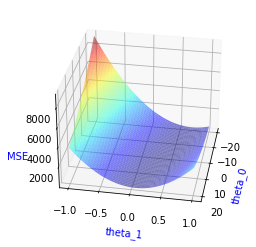

In [472]:
# グラフの描画
# theta_mesh[0],theta_mesh[1]の配列がそのままではMSEの値と対応していないので、転置している。(これはmeshgridとproductの結果で判断)
ax = plt.axes(projection='3d')
ax.plot_surface(X=theta_mesh[0].T, Y=theta_mesh[1].T, Z=mse_reshape, cmap='jet', alpha=0.5)
ax.set_xlabel("theta_0", size = 10, color = "b")
ax.set_ylabel("theta_1", size = 10, color = "b")
ax.set_zlabel("MSE", size = 10, color = "b")
# 見る角度を変える
ax.view_init(elev=30, azim=10)

In [108]:
# パラメタ3つ、特徴量2つの場合のテスト。特徴量はいいのがなかったので'rent'を使っている。
theta_0 = np.linspace(-2,2,10)
theta_1 = np.linspace(3,6,10)
theta_2 = np.linspace(9,2,10)
theta = [theta_0, theta_1, theta_2]
target_var = df['rent'].values
features = df[['space','rent']].values
mse = cost_func(theta, target_var=target_var, features=features)
mse.shape

(1000,)

### - 最急降下法のアルゴリズム実装
学習率は$\alpha=0.00005$、反復回数は10万回とする。

In [346]:
# 学習率、反復回数(epochs)を設定。機械学習では反復１回１回をエポックと呼ぶことが多い。
alpha = 0.00005
epochs = 100000
# パラメタの初期値を設定。
# 本来の最急降下法ではパラメタの初期値はランダムに決める
# theta_0_init = np.random.uniform(min_0,max_0)
theta_0 = -5
theta_1 = -0.5
theta_init = np.array([theta_0, theta_1])

In [358]:
# 最急降下法の関数テスト
features = df['space'].values
target_var = df['rent'].values
optimized_theta, theta_history = grad_descent(theta_init, target_var, features, alpha, epochs)

In [360]:
# 最急降下法の結果得られた最適なパラメタ(theta_0,theta_1)の組み合わせ
optimized_theta

(5.692313583745944, 0.2972194648547114)

### - 最急降下法の推移を描画する
* それぞれの$\theta_0$と $\theta_1$ における損失関数の推移を計算
* $\theta_0$と$\theta_1$ の推移を損失関数に合わせて描画
* $\theta_0$と$\theta_1$の推移を等高線で描画
* 得られた$\theta_0$と$\theta_1$の解で回帰直線を描画

In [639]:
# thetaの履歴の値に対応する損失関数の値を求める。
# 講義のようにリスト内包表記で計算するよりもnumpy arrayを渡して計算した方が早い。
params_and_mse = np.array(theta_history)
mse_history = cost_func(params_and_mse, target_var, features)

In [640]:
mse_history

array([2936.33697597, 1418.4319227 ,  695.35537741, ...,    6.56254019,
          6.56252192,    6.56250366])

mseの計算履歴を確認すると、どんどん損失が小さくなっていることが分かる。

In [641]:
mse_history.shape

(100001,)

In [642]:
params_and_mse.shape

(100001, 2)

In [643]:
# theta_historyとmse_historyを結合
params_and_mse = np.concatenate((params_and_mse, mse_history.reshape(len(mse_history),1)), axis=1)
params_and_mse[0]

array([-5.00000000e+00, -5.00000000e-01,  2.93633698e+03])

In [644]:
params_and_mse[:,0]

array([-5.        , -4.99497026, -4.99141822, ...,  5.69225315,
        5.69228337,  5.69231358])

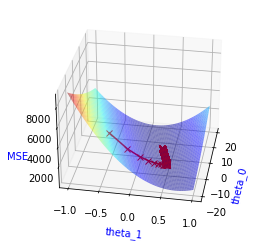

In [656]:
# 図１：損失関数とパラメタの点推移の描画。
ax1 = plt.axes(projection='3d')
# ax1は損失関数の概形を描画ずるものなので、theta_historyでplot_surfaceを書き直す必要はないことに注意。
ax1.plot_surface(X=theta_mesh[0].T, Y=theta_mesh[1].T, Z=mse_reshape, cmap='jet', alpha=0.5)
# 見やすいようにx軸（theta_0）を逆向きにする
plt.gca().invert_xaxis()
# ラベル付与
ax1.set_xlabel("theta_0", size = 10, color = "b")
ax1.set_ylabel("theta_1", size = 10, color = "b")
ax1.set_zlabel("MSE", size = 10, color = "b")
# 最急降下法のパラメタとそのときの損失関数の値をプロット
ax1.plot(xs=params_and_mse[:,0], ys=params_and_mse[:,1], zs=params_and_mse[:,2], marker='x',color='red')

# 見る角度を変える
ax1.view_init(elev=30, azim=10)


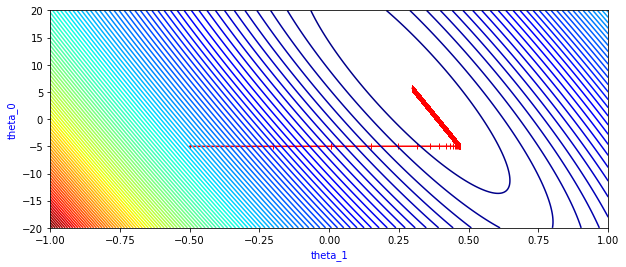

In [664]:
# 図２：パラメタを2次元等高線で表わす。
# 参考：https://it-mayura.com/python/pm013/
ax2 = plt.axes()
ax2.set_xlabel("theta_1", size = 10, color = "b")
ax2.set_ylabel("theta_0", size = 10, color = "b")
ax2.plot(params_and_mse[:,1], params_and_mse[:,0], marker='|', color='red')
# 等高線のレベル（z方向の高さ）を定義。mseの最小値と最大値の範囲で100分割する
levels = np.linspace(mse_reshape.min(),mse_reshape.max(),100)
# 等高線を描画。上図の見方に合わせるため、ここではx軸はtheta_1,y軸はtheta_0とする。レベルにはmse_reshapeを指定。
# 引数はplot_surfaceのものでOK。
ax2.contour(theta_mesh[1].T, theta_mesh[0].T,mse_reshape, levels=levels,cmap='jet')
ax2.contourf(theta_mesh[1].T, theta_mesh[0].T, mse_reshape,levels=levels ,colors='w')   

fig.tight_layout()

復習：  
等高線は値が同じ（上でいう損失関数の値）点を線で結んだもの。線の間隔が細かい領域ほど値の変化が急である。  
上図からわかる通り、最小値は○の中心にある。よって、○の中心に近づいているので、最急降下法のアルゴリズムは正しく実装できたと思われる。

In [612]:
optimized_theta

(5.692313583745944, 0.2972194648547114)

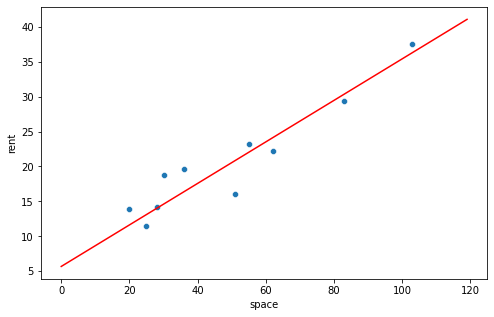

In [671]:
# 図3：最終的に得られた（最適化された）パラメタを使って回帰直線を描画
plt.figure(figsize=(8,5))
sns.scatterplot(x='space', y='rent', data=df)
# x軸、y軸の値を定義。y軸は線形回帰モデルから得られた予測値。
x_reg = np.arange(120)
y_reg =optimized_theta[0] + optimized_theta[1] * x_reg

plt.plot(x_reg, y_reg, color='red')


In [672]:
x_reg

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119])

In [677]:
# まとめ。以下のような線形回帰モデルが得られたことになる。
space = 70
rent = optimized_theta[0] + optimized_theta[1] * space
rent

26.497676123575744

70平米の家賃は上記ぐらいと予想できる。